# Train YOLOv9 on a Custom Dataset
---


## 1 - выбрать gpu

Для проверки можете прописать команду `nvidia-smi`. Если возникла ошибка то  `Edit` -> `Notebook settings` -> `Hardware accelerator`, выбираете `GPU` и `Save`.

In [1]:
!nvidia-smi

Sun Apr 14 09:13:59 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**NOTE:** Чтобы проще было работать с датасетом потом, добавляем `HOME` константу.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## 2 - Склонировать модель yolov9

**NOTE:**
YOLO (You Only Look Once):
YOLO («You Only Look Once» — «Смотришь только один раз») — это алгоритм распознавания объектов в реальном времени, впервые описанный в 2015 году Джозефом Редмоном и другими в статье You Only Look Once: Unified, Real-Time Object Detection. Статья доступна здесь https://arxiv.org/abs/1506.02640.

In [3]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

fatal: destination path 'yolov9' already exists and is not an empty directory.
/content/yolov9


## 3 - загружаем веса

> YOLOv9, выпущенный в феврале 2024 года, представляет собой улучшенную модель обнаружения объектов в реальном времени, включающую инновации, такие как программирование информации о градиенте (PGI) и Сеть Обобщенной Эффективной Агрегации Слоев (GELAN), для повышения точности. Эта версия, доступная в четырех модификациях (v9-S, v9-M, v9-C, и v9-E), нацелена на превосходство над всеми методами, основанными на свертках и трансформерах, в задаче обнаружения объектов.



In [4]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [5]:
!ls -la {HOME}/weights

total 804880
drwxr-xr-x 2 root root      4096 Apr 14 09:14 .
drwxr-xr-x 1 root root      4096 Apr 14 09:08 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt.1
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt.1
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt.1
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt.1


## 4 - Проверяем на pretrained COCO model

***gelan-c***


!python detect.py: Запускает скрипт detect.py с помощью интерпретатора Python. Восклицательный знак (!) используется в ноутбуках Jupyter для выполнения команд терминала из ячейки кода.

--weights {HOME}/weights/gelan-c.pt: Опция --weights указывает путь к файлу с весами модели, который будет использоваться для обнаружения объектов.

--conf 0.1: Опция --conf задает порог уверенности для обнаружения объектов. В данном случае порог установлен на уровне 0.1, что означает, что будут отображаться обнаружения с уверенностью 10% и выше.

--source {HOME}/data/{ваше название файла}.jpeg: Опция --source указывает путь к исходному изображению или видео, на котором необходимо выполнить обнаружение объектов.

--device 0: Опция --device указывает, какое устройство использовать для обнаружения. В данном случае 0 обычно означает использование gpu.

In [6]:
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source {HOME}/data/cat.jpeg --device 0

detect: weights=['/content/weights/gelan-c.pt'], source=/content/data/cat.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 467 layers, 25472640 parameters, 0 gradients, 102.8 GFLOPs
image 1/1 /content/data/cat.jpeg: 416x640 1 cat, 151.2ms
Speed: 0.5ms pre-process, 151.2ms inference, 490.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


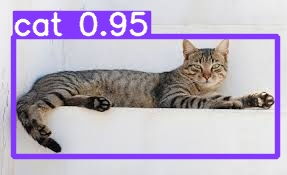

In [7]:
from IPython.display import Image
Image(filename='runs/detect/exp/cat.jpeg', width=600)

## 5 - загружаем датасет

**NOTE:** Установим еще [`roboflow`](https://pypi.org/project/roboflow)

Набор данных для этого задания будет взят из Вселенной Roboflow, которая является крупнейшим в мире источником открытых наборов данных и API для компьютерного зрения.

**NOTE:** датасет нужно хранить внутри `{HOME}/yolov9`

In [8]:
%cd {HOME}/yolov9

/content/yolov9


In [9]:
!pip install roboflow

**NOTE:** [mask recognition](https://universe.roboflow.com/egor-badika/maskrecognition-ryycn) В этом руководстве я буду использовать набор данных для обнаружения футбольных игроков. Вы можете заменить его своим набором данных в формате YOLO или использовать другой набор данных, доступный в Roboflow Universe.

In [22]:
from roboflow import Roboflow
rf = Roboflow(api_key="ZpkgNig9bEFwMkMCqeLe")
project = rf.workspace("egor-badika").project("maskrecognition-ryycn")
version = project.version(1)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...


## 6 - делаем fine tuning




In [25]:
%cd {HOME}/yolov9

!python train.py \
--epochs 30 \
--img-size 640 \
--data /content/yolov9/MaskRecognition-1/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-04-14 09:36:30.027643: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-14 09:36:30.027707: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-14 09:36:30.029084: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-14 09:36:31.232841: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=/content/yolov9/MaskRecognition-1/data.yaml, hyp=hyp.scratch-high.yaml, epochs=30, batch_size=16, imgsz=640, rect=False, resume=False, nosave=Fa

## 7 - проверяем результаты

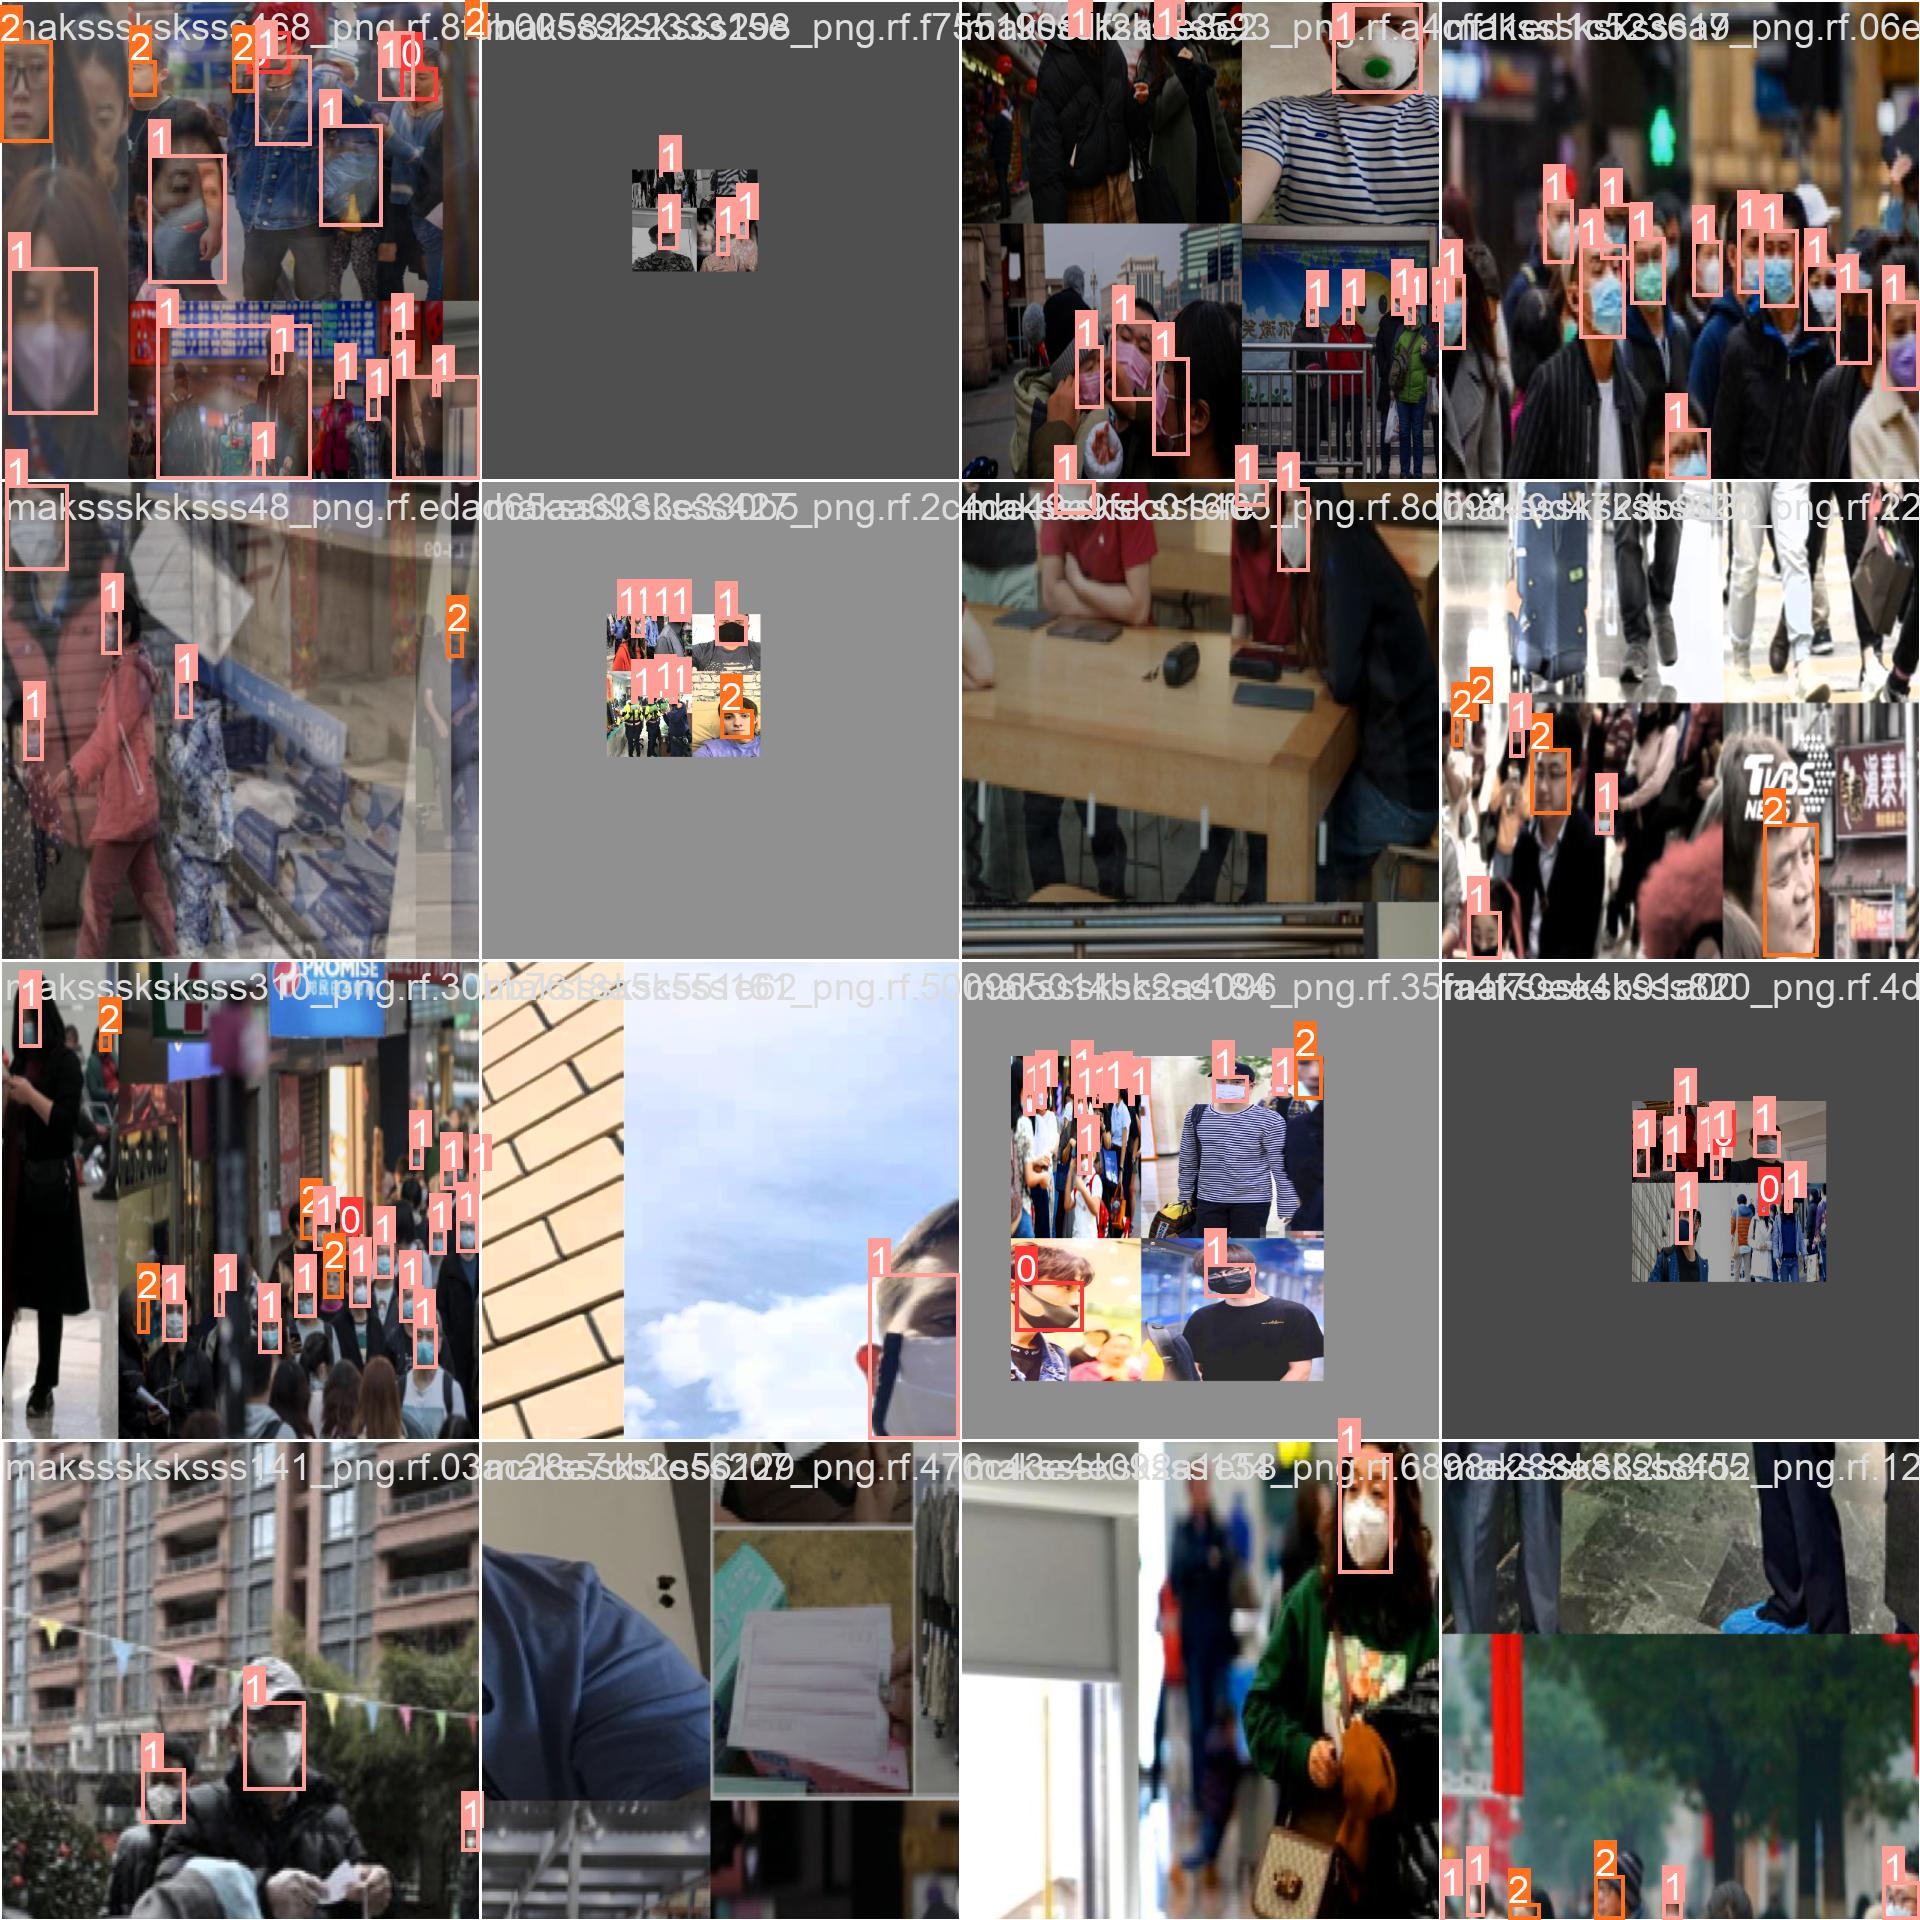

In [32]:
from IPython.display import Image

image_path = "runs/train/exp2/train_batch2.jpg"
image_width = 800

Image(filename=image_path, width=image_width)